# Classification Models

- In this lecture, we will investiage mulitple classification models.

### Performance Metrics(성능 지표들)

- For regression models, we used performance measures such as,
    - $R^2$: measures how close the predicted value is to the actual value
    - MAE, MSE: measures the overall error of a prediction model.
    
- However, since dependent variables of classification problems are discrete and categorical, we need an alternative performance measure.
    - 분류모형은 continuous가 아니라(discrete) 위의 것들을 사용하지 못하고 다른 것들을 사용함
### Confusion Matrix

<img src="./img/confusion matrix.png" width="400" height="400">

- True class: Actual values of $y_i$
- Predicted class: Predicted values of $y_i$ ($\hat{y}_i$)
- Accuracy: ${ TP + TN \over TP + TN + FP +FN }$
    - Measures the overall performance of the model
    - Sensitive to class imbalance $\Rightarrow$ We need alternative measures
    - 전체 data중 우리 모형이 맞춘 data의 비율
    - 그러나 true class 비율 50:50쯤이 아니고 70:30이면 그냥 positive로만 냅다 찍어도 예측력이 0이지만 정확도가 70%다(잘못해석) 이걸 방지하기위해 대체 지표들이 아래에 있다
- Recall: ${TP \over TP + FN}$
    - 전체 positive인 trua data중 positive로 맞춘 비율
- Precision: ${TP \over TP  + FP}$
    - 전체 예측 중 positive를 맞춘 비율
- F1-score: $2 \cdot {recall \cdot precision \over recall + precision} $
    - recall과 precision을 평균 낸 것이라고 보면 됨

### Data

- For convenience, we will work with one dataset only.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

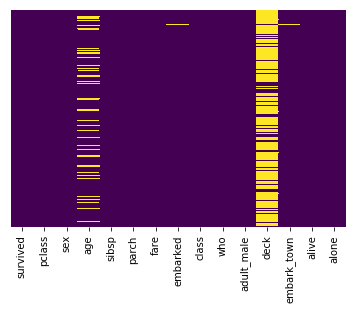

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df = df.drop(['age', 'embarked', 'deck', 'embark_town'], axis=1)

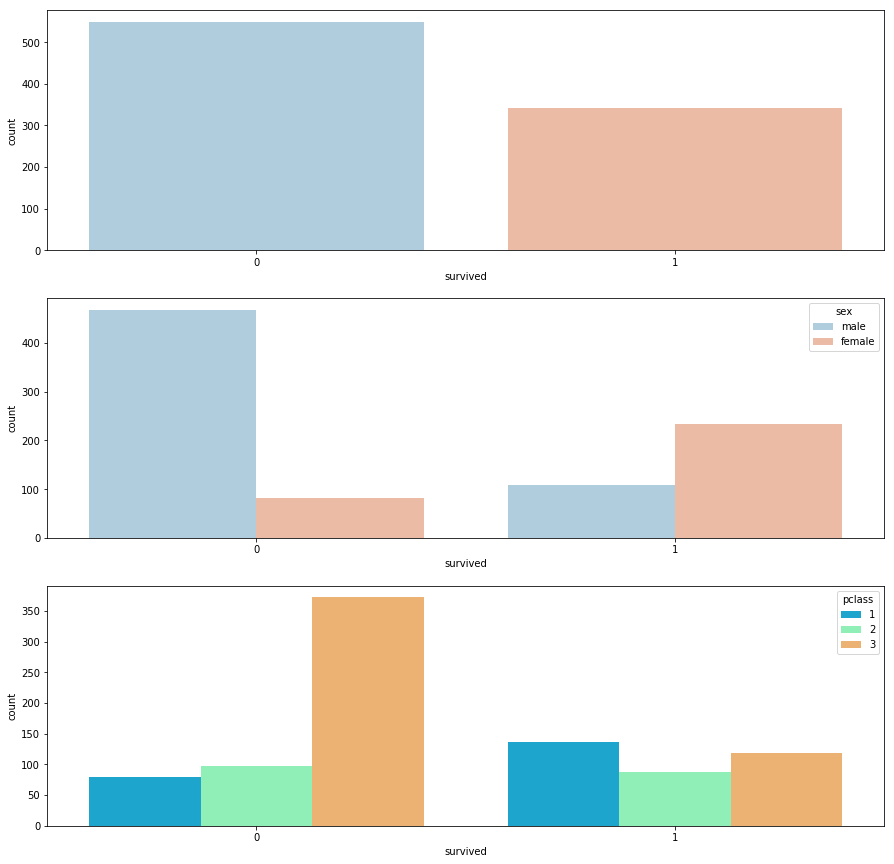

In [6]:
plt.figure(figsize=(15,15))
plt.subplot(311)
sns.countplot(x='survived',data=df,palette='RdBu_r')
plt.subplot(312)
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')
plt.subplot(313)
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')
plt.show()